In [1]:
import statistics as ST
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pickle
import scipy.stats
import numpy as np
import math
import copy
import re
import matplotlib as mpl
mpl.rcParams["font.size"] = 12
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['pdf.fonttype'] = 42

## Fig. S11

In [2]:
SCD_strand_merge = pd.read_csv('Source_data/' + 'FigS11_SCD_motif_strand_specific_effect.csv')

In [5]:
p3e_SCD_r,p3e_SCD_p = scipy.stats.pearsonr(SCD_strand_merge['relative_fold_median_Forward'],SCD_strand_merge['relative_fold_median_Reverse'])

In [6]:
# Fig in both orientation

Text(0.95, 0.3, "Pearson'r = 0.2825, $\\it{P}$ value < 0.0001")

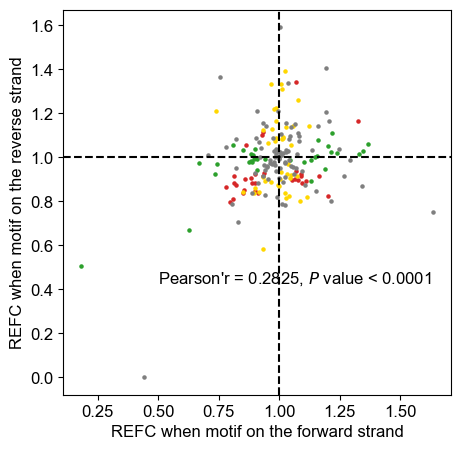

In [7]:
gs = gridspec.GridSpec(1, 5) 
fig1 = plt.figure(figsize=(5,5))
#Here I generate sub figure object 
ax4=fig1.add_subplot(gs[:1, :5])

input_df1 = SCD_strand_merge
filter1 = (input_df1['Significant_Forward']=='Yes')&(input_df1['Significant_Reverse']=='Yes')
filter2 = (input_df1['Significant_Forward']=='Yes')&(input_df1['Significant_Reverse']=='No')
filter3 = (input_df1['Significant_Forward']=='No')&(input_df1['Significant_Reverse']=='Yes')
filter4 = (input_df1['Significant_Forward']=='No')&(input_df1['Significant_Reverse']=='No')
ax4.scatter(input_df1.loc[filter1]['relative_fold_median_Forward'],input_df1.loc[filter1]['relative_fold_median_Reverse'], s=5, color = "tab:red")
ax4.scatter(input_df1.loc[filter2]['relative_fold_median_Forward'],input_df1.loc[filter2]['relative_fold_median_Reverse'], s=5, color = "tab:green")
ax4.scatter(input_df1.loc[filter3]['relative_fold_median_Forward'],input_df1.loc[filter3]['relative_fold_median_Reverse'], s=5, color = "gold")
ax4.scatter(input_df1.loc[filter4]['relative_fold_median_Forward'],input_df1.loc[filter4]['relative_fold_median_Reverse'], s=5, color = "tab:grey")
# ax4.set_title('D',loc='left',size = 9)
ax4.axvline(x=1,color='black', linestyle='--')
ax4.axhline(y=1,color='black', linestyle='--')
ax4.set_xlabel("REFC when motif on the forward strand")
ax4.set_ylabel("REFC when motif on the reverse strand")
ax4.text(0.95,0.3, "Pearson'r = "+str(round(p3e_SCD_r,4))+ ", $\it{P}$ value < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)

# ax5=fig1.add_subplot(gs[:1, 6:11])
# input_df1 = YPD_strand_merge
# filter1 = (input_df1['Significant_Forward']=='Yes')&(input_df1['Significant_Reverse']=='Yes')

# ax5.scatter(input_df1.loc[filter1]['relative_fold_median_Forward'],input_df1.loc[filter1]['relative_fold_median_Reverse'], s=5, color = "tab:red")
# ax5.axvline(x=1,color='black', linestyle='--')
# ax5.axhline(y=1,color='black', linestyle='--')
# ax5.set_xlabel("REFC when motif on the forward strand")
# ax5.set_ylabel("REFC when motif on the reverse strand")

# ax6=fig1.add_subplot(gs[:1, 12:17])

# input_df1 = SCD_strand_merge
# filter1 = (input_df1['Significant_Forward']=='Yes')&(input_df1['Significant_Reverse']=='Yes')

# ax6.scatter(input_df1.loc[filter1]['relative_fold_median_Forward'],input_df1.loc[filter1]['relative_fold_median_Reverse'], s=5, color = "tab:red")
# ax6.axvline(x=1,color='black', linestyle='--')
# ax6.axhline(y=1,color='black', linestyle='--')
# ax6.set_xlabel("REFC when motif on the forward strand")
# ax6.set_ylabel("REFC when motif on the reverse strand")
# print(scipy.stats.pearsonr(input_df1['relative_fold_median_Forward'],input_df1['relative_fold_median_Reverse']))
# fig1.savefig(fig_output_address+'FigS11.pdf')

---

## Fig. S12

In [9]:
F_strand_merge = pd.read_csv('Source_data/' + 'FigS12_Forward_motif_merge.csv')

In [10]:
R_strand_merge = pd.read_csv('Source_data/' + 'FigS12_Reverse_motif_merge.csv')

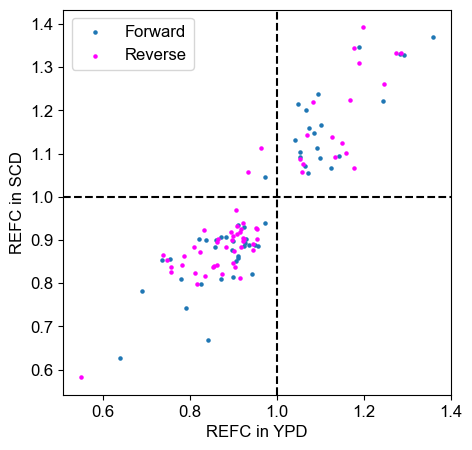

In [11]:
gs = gridspec.GridSpec(1, 1) 
fig1 = plt.figure(figsize=(5,5))
ax6=fig1.add_subplot(gs[:1, 0:1])

input_df1 = F_strand_merge
filter1 = (input_df1['Significant_YPD']=='Yes')&(input_df1['Significant_SCD']=='Yes')

ax6.scatter(input_df1.loc[filter1]['relative_fold_median_YPD'],input_df1.loc[filter1]['relative_fold_median_SCD'], s=5, color = "tab:blue",label ='Forward')


# ax6.set_title('F',loc='left',size = 9)
ax6.axvline(x=1,color='black', linestyle='--')
ax6.axhline(y=1,color='black', linestyle='--')
ax6.set_xlabel("REFC in YPD")
ax6.set_ylabel("REFC in SCD")
# ax1.set_xscale('log',base = 2)
# ax1.set_yscale('log',base = 2)

input_df1 = R_strand_merge
filter2= (input_df1['Significant_YPD']=='Yes')&(input_df1['Significant_SCD']=='Yes')
# filter2 = (input_df1['Significant_YPD']=='Yes')&(input_df1['Significant_SCD']=='No')
# filter3 = (input_df1['Significant_YPD']=='No')&(input_df1['Significant_SCD']=='Yes')
# filter4 = (input_df1['Significant_YPD']=='No')&(input_df1['Significant_SCD']=='No')
ax6.scatter(input_df1.loc[filter2]['relative_fold_median_YPD'],input_df1.loc[filter2]['relative_fold_median_SCD'], s=5, color = "fuchsia",label ='Reverse')
ax6.legend(loc="upper left")
# fig1.savefig(fig_output_address+'FigS12.pdf')

----

## Fig. S14

In [14]:
YPD_E_genic_SL_shared_example = pd.read_csv('Source_data/' + 'FigS14_YPD_genic_SL_shared_example.csv')
YPD_E_genic_ST_shared_example = pd.read_csv('Source_data/' + 'FigS14_YPD_genic_ST_shared_example.csv')

In [15]:
YPD_E_genic_SL_example1 = pd.read_csv('Source_data/' + 'FigS14_YPD_genic_SL_example1.csv')
YPD_E_genic_SL_example2 = pd.read_csv('Source_data/' + 'FigS14_YPD_genic_SL_example2.csv')

In [16]:
YPD_E_intergenic_SL_example1 = pd.read_csv('Source_data/' + 'FigS14_YPD_intergenic_SL_example1.csv')
YPD_E_intergenic_SL_example2 = pd.read_csv('Source_data/' + 'FigS14_YPD_intergenic_SL_example2.csv')

In [18]:
input_df = pd.read_csv('Source_data/' + 'FigS14_SCD_Intergenic_comparison_test.csv')

In [19]:
input_df_2 = pd.read_csv('Source_data/' + 'FigS14_YPD_Intergenic_comparison_test.csv')

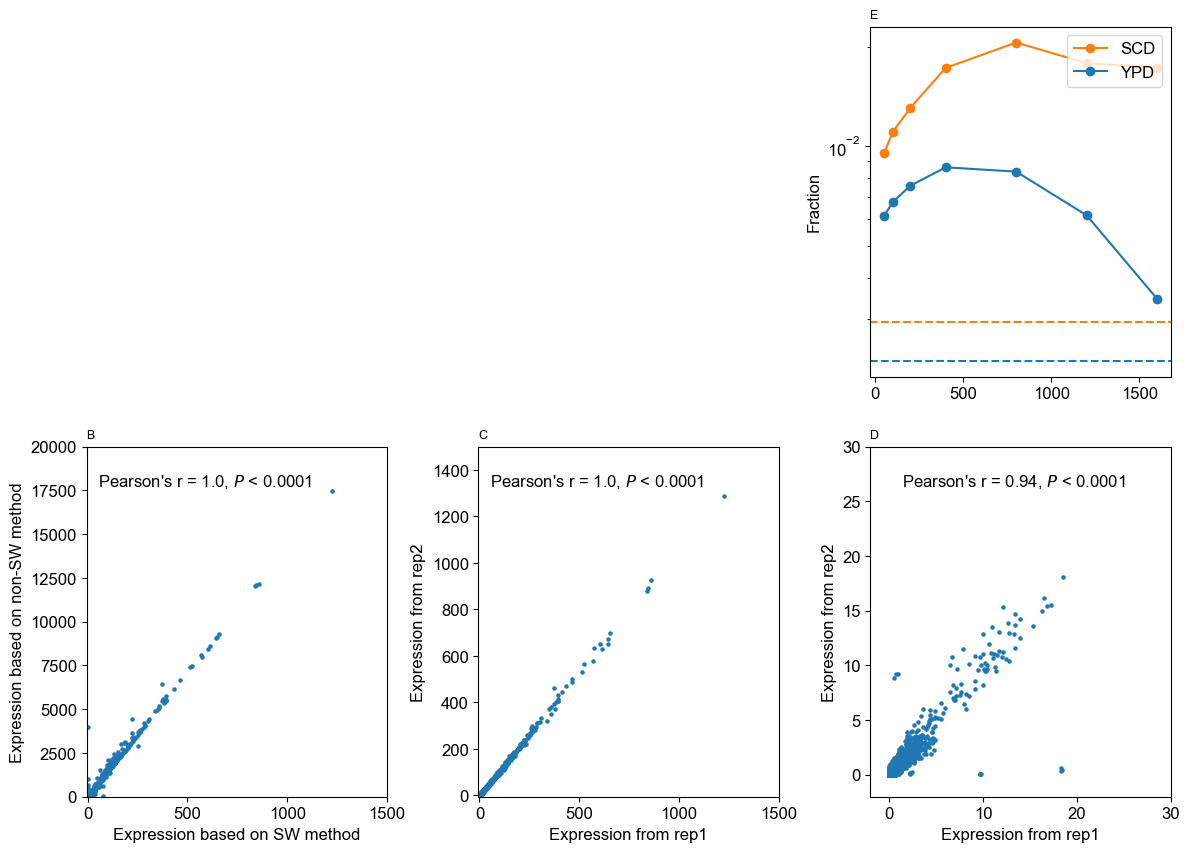

In [24]:

# I resample a promoter set y that has the same DNA count profile as X and check their expression profile.
gs = gridspec.GridSpec(2, 15) 
fig3 = plt.figure(figsize=(15,10))
#Here I generate sub figure object and assign to corresponding location
ax1 = fig3.add_subplot(gs[1:2, 1:5])
# ax8.text(0.45,0.9, "Pearson's r = "+str(round(t_SCD_RT,4)), size=12, ha="right",verticalalignment='center', transform=ax6.transAxes)


r_YPD,p_YPD = scipy.stats.pearsonr(YPD_E_genic_SL_shared_example['Normalized_count_perM'].tolist(),
            YPD_E_genic_ST_shared_example['TPM'].tolist())
# I did log transformation, which mean I get rid of zero expression
ax1.scatter(YPD_E_genic_SL_shared_example['Normalized_count_perM'].tolist(),
            YPD_E_genic_ST_shared_example['TPM'].tolist(),s=5)
ax1.set_xlabel('Expression based on SW method')
ax1.set_ylabel('Expression based on non-SW method')
ax1.set(xlim=(-5,1500), ylim=(-5,20000))
# ax1.scatter(np.log10(YPD_E_genic_SL_shared_example['Normalized_count_perM'].tolist()),
#             np.log10(YPD_E_genic_ST_shared_example['TPM'].tolist()))
# ax1.set_xlabel('Expression based on SW method (log10)')
# ax1.set_ylabel('Expression based on non-SW method (log10)')

ax1.set_title('B',loc='left',size = 9)




ax1.text(0.75,0.9, "Pearson's r = "+str(round(r_YPD,2))+", " + "$\it{P}$" + " < 0.0001",  size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)


# correlation between YPD samples of genic
temp_r1,temp_p1 = scipy.stats.pearsonr(YPD_E_genic_SL_example1['Normalized_count_perM'].tolist(),YPD_E_genic_SL_example2['Normalized_count_perM'].tolist())


ax2 = fig3.add_subplot(gs[1:2, 6:10])
ax2.text(0.75,0.9, "Pearson's r = "+str(round(temp_r1,2))+", " + "$\it{P}$" + " < 0.0001",  size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax2.scatter(YPD_E_genic_SL_example1['Normalized_count_perM'].tolist(),YPD_E_genic_SL_example2['Normalized_count_perM'].tolist(),s=5)
ax2.set_ylabel('Expression from rep2')
ax2.set_xlabel('Expression from rep1')
ax2.set(xlim=(-5,1500), ylim=(-5,1500))

# ax2.scatter(np.log10(YPD_E_genic_SL_example1['Normalized_count_perM'].tolist()),np.log10(YPD_E_genic_SL_example2['Normalized_count_perM'].tolist()))
# ax2.set_ylabel('Log(expression) from rep2')
# ax2.set_xlabel('Log(expression) from rep1')

ax2.set_title('C',loc='left',size = 9)

# correlation between YPD samples of intergenic

temp_r1,temp_p1 = scipy.stats.pearsonr(YPD_E_intergenic_SL_example1['Normalized_count_perM'].tolist(),
                                       YPD_E_intergenic_SL_example2['Normalized_count_perM'].tolist())


ax3 = fig3.add_subplot(gs[1:2, 11:15])
ax3.text(0.85,0.9, "Pearson's r = "+str(round(temp_r1,2))+", " + "$\it{P}$" + " < 0.0001",  size=12, ha="right",verticalalignment='center', transform=ax3.transAxes)

ax3.scatter(YPD_E_intergenic_SL_example1['Normalized_count_perM'].tolist(),
            YPD_E_intergenic_SL_example2['Normalized_count_perM'].tolist(),s=5)
ax3.set_ylabel('Expression from rep2')
ax3.set_xlabel('Expression from rep1')
ax3.set(xlim=(-2,30), ylim=(-2,30))

# ax3.scatter(np.log10(YPD_E_genic_SL_example1['Normalized_count_perM'].tolist()),np.log10(YPD_E_genic_SL_example2['Normalized_count_perM'].tolist()))
# ax3.set_ylabel('Log(expression) from rep2')
# ax3.set_xlabel('Log(expression) from rep1')

ax3.set_title('D',loc='left',size = 9)



ax4 = fig3.add_subplot(gs[:1, 11:15])
ax4.plot(input_df['UTR_length'], input_df['More_than_Control_FDR_fraction'],  '-o',label = 'SCD',color = 'tab:orange')
ax4.plot(input_df_2['UTR_length'], input_df_2['More_than_Control_FDR_fraction'],  '-o',label = 'YPD',color = 'tab:blue')

ax4.set_title('E',loc='left',size = 9)
ax4.set_ylabel('Fraction')
ax4.set_yscale('log',base = 10)
ax4.legend(loc='upper right')
# this specify the fraction of promoter>PC in YPD in rd project
ax4.axhline(y=0.00224,color = 'tab:blue', linestyle='--')
ax4.axhline(y=0.00294,color = 'tab:orange', linestyle='--')
# fig3.savefig(fig_output_address+'New Folder/FigS14_part.pdf')

## Fig. S15

In [26]:
p_c_rd_SCD = pd.read_csv('Source_data/' + 'FigS15_SCD_RD_comparison_summary.csv')
p_c_RNAseq_SCD = pd.read_csv('Source_data/' + 'FigS15_SCD_intergenic_comparison_summary.csv')
SCD_RNA_fraction = pd.read_csv('Source_data/' + 'FigS15_SCD_intergenic_fraction_greater_than_cutoff.csv')
SCD_rd_fraction = pd.read_csv('Source_data/' + 'FigS15_SCD_RD_fraction_greater_than_cutoff.csv')
temp_shared_2 = pd.read_csv('Source_data/' + 'FigS15_SCD_Intergenic_GXE.csv')
temp_shared_1 = pd.read_csv('Source_data/' + 'FigS15_SCD_RD_GXE.csv')

In [27]:
from matplotlib.markers import MarkerStyle

/var/folders/xv/26kbh4lj2rjdcrxz37m9wxyw0000gn/T/ipykernel_72049/179204495.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(temp_tick_list, size =10)


Text(0.5, 0, '$\\it{REL}$ cutoff')

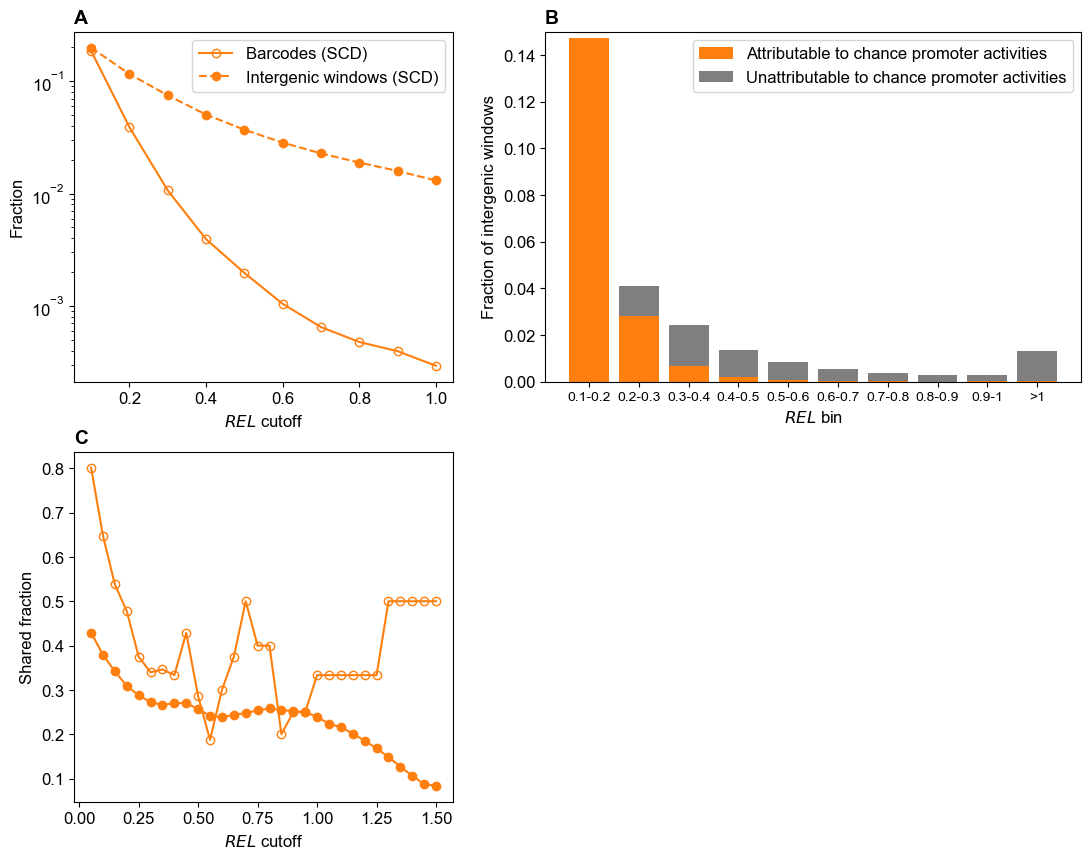

In [28]:
gs = gridspec.GridSpec(2, 13) 
fig1 = plt.figure(figsize=(13,10))
#Here I generate sub figure object and assign to corresponding location
#panel A for SCD expression distribution
ax3=fig1.add_subplot(gs[:1, :5])

ax3.set_title('A',loc='left',weight ='bold', size = 14)
ax3.plot(p_c_rd_SCD['Percentile_of_PC'], p_c_rd_SCD['better_than_pc_ratio'],  
         marker=MarkerStyle('o', fillstyle='none'),label = 'Barcodes (SCD)',color ='tab:orange')

ax3.plot(p_c_RNAseq_SCD['Control_percentile'], p_c_RNAseq_SCD['More_than_Control_FDR_fraction'],
         '--o', label = 'Intergenic windows (SCD)',color ='tab:orange')


# ax3.set_title('Greater than PC',fontsize=20)
ax3.set_xlabel("$\it{REL}$ cutoff")
ax3.set_ylabel("Fraction")
ax3.legend(loc="upper right")
ax3.set_yscale('log',base=10)

ax4=fig1.add_subplot(gs[:1, 6:13])
temp_interval = 0
tempx_list = [str(x) for x in SCD_RNA_fraction['bins'][temp_interval:]]
ax4.bar(tempx_list, SCD_rd_fraction['Fraction'][temp_interval:],
        color = 'tab:orange',label = 'Attributable to chance promoter activities')
temp_input_list = (np.array(SCD_RNA_fraction['Fraction'])[temp_interval:]-np.array(SCD_rd_fraction['Fraction'])[temp_interval:])
temp_input_list[temp_input_list<0] = 0
ax4.bar(tempx_list,temp_input_list,
        color = 'tab:grey',bottom = SCD_rd_fraction['Fraction'][temp_interval:],
        label = 'Unattributable to chance promoter activities')
ax4.set_ylabel('Fraction of intergenic windows')
ax4.legend(loc="upper right")
ax4.set_title('B',loc='left',weight ='bold', size = 14)
ax4.set_xlabel('$\it{REL}$ bin')
ax4.set_ylim(0,0.15)
temp_tick_list = ['0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6',
                 '0.6-0.7','0.7-0.8','0.8-0.9','0.9-1','>1']
ax4.set_xticklabels(temp_tick_list, size =10)

# correlation of nearby genes
ax5=fig1.add_subplot(gs[1:2, :5])

ax5.set_title('C',loc='left',weight ='bold', size = 14)
ax5.plot(temp_shared_1['Control_percentile'][:30],
                temp_shared_1['More_than_control_fraction_SCD'][:30],label = 'RD',marker=MarkerStyle('o', fillstyle='none'),color = 'tab:orange')
ax5.plot(temp_shared_2['Control_percentile'][:30],
                temp_shared_2['More_than_control_fraction_SCD'][:30],'-o',label = 'Intergenic',color = 'tab:orange')
ax5.set_ylabel('Shared fraction')
ax5.set_xlabel('$\it{REL}$ cutoff') 

# fig1.savefig(fig_output_address+'FigS14.pdf')

## Fig. S16

In [29]:
compare_boundary_cor_V1_NM = pd.read_csv('Source_data/' + 'FigS16_YPD_compare_boundary_cor_V1_NO.csv')
compare_boundary_cor_V1_NM_SN = pd.read_csv('Source_data/' + 'FigS16_YPD_compare_boundary_cor_V1_NO_SN.csv')
compare_boundary_cor_V1_NM_RT = pd.read_csv('Source_data/' + 'FigS16_YPD_compare_boundary_cor_V1_NO_RT.csv')

In [30]:
temp_input_df = compare_boundary_cor_V1_NM
cutoff_utr = 200
temp_filtered2 = temp_input_df[temp_input_df['UTR_length']==cutoff_utr]
temp_ouput2=temp_filtered2.groupby(['UTR_length'], as_index=False).agg({'pearson_r':['mean','sem','std'],'spearman_r':['mean','sem','std'],
                                                                      'Number_of_long_interval':['mean','sem','std']})
temp_ouput2_DN_YPD = temp_ouput2

In [31]:
temp_input_df = compare_boundary_cor_V1_NM_SN
cutoff_utr = 200
temp_filtered2 = temp_input_df[temp_input_df['UTR_length']==cutoff_utr]
temp_ouput2=temp_filtered2.groupby(['UTR_length'], as_index=False).agg({'pearson_r':['mean','sem','std'],'spearman_r':['mean','sem','std'],
                                                                      'Number_of_long_interval':['mean','sem','std']})
temp_ouput2_SN_YPD = temp_ouput2

In [32]:
temp_input_df = compare_boundary_cor_V1_NM_RT
cutoff_utr = 200
temp_filtered2 = temp_input_df[temp_input_df['UTR_length']==cutoff_utr]
temp_ouput2=temp_filtered2.groupby(['UTR_length'], as_index=False).agg({'pearson_r':['mean','sem','std'],'spearman_r':['mean','sem','std'],
                                                                      'Number_of_long_interval':['mean','sem','std']})
temp_ouput2_RT_YPD = temp_ouput2

In [33]:
compare_boundary_cor_V1_NM = pd.read_csv('Source_data/' + 'FigS16_SCD_compare_boundary_cor_V1_NO.csv')
compare_boundary_cor_V1_NM_SN = pd.read_csv('Source_data/' + 'FigS16_SCD_compare_boundary_cor_V1_NO_SN.csv')
compare_boundary_cor_V1_NM_RT = pd.read_csv('Source_data/' + 'FigS16_SCD_compare_boundary_cor_V1_NO_RT.csv')

In [34]:
temp_input_df = compare_boundary_cor_V1_NM
cutoff_utr = 200
temp_filtered2 = temp_input_df[temp_input_df['UTR_length']==cutoff_utr]
temp_ouput2=temp_filtered2.groupby(['UTR_length'], as_index=False).agg({'pearson_r':['mean','sem','std'],'spearman_r':['mean','sem','std'],
                                                                      'Number_of_long_interval':['mean','sem','std']})
temp_ouput2_DN_SCD = temp_ouput2

In [35]:
temp_input_df = compare_boundary_cor_V1_NM_SN
cutoff_utr = 200
temp_filtered2 = temp_input_df[temp_input_df['UTR_length']==cutoff_utr]
temp_ouput2=temp_filtered2.groupby(['UTR_length'], as_index=False).agg({'pearson_r':['mean','sem','std'],'spearman_r':['mean','sem','std'],
                                                                      'Number_of_long_interval':['mean','sem','std']})
temp_ouput2_SN_SCD = temp_ouput2

In [36]:
temp_input_df = compare_boundary_cor_V1_NM_RT
cutoff_utr = 200
temp_filtered2 = temp_input_df[temp_input_df['UTR_length']==cutoff_utr]
temp_ouput2=temp_filtered2.groupby(['UTR_length'], as_index=False).agg({'pearson_r':['mean','sem','std'],'spearman_r':['mean','sem','std'],
                                                                      'Number_of_long_interval':['mean','sem','std']})
temp_ouput2_RT_SCD = temp_ouput2

Text(0, 0.5, "Pearson's r")

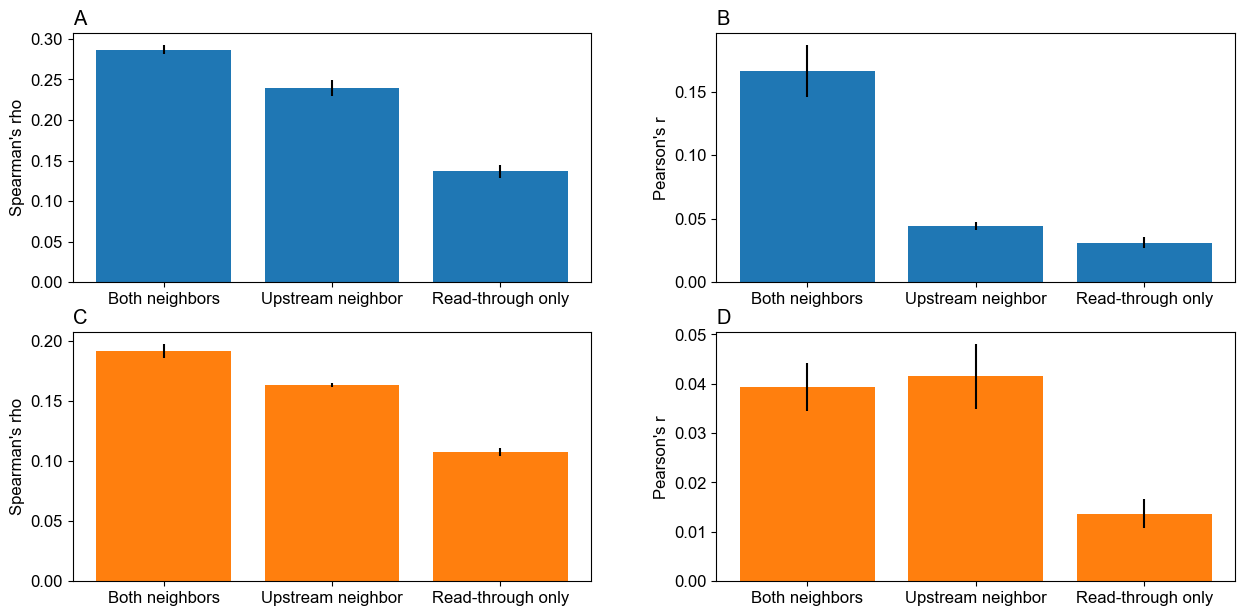

In [37]:
gs = gridspec.GridSpec(3, 11) 
fig1 = plt.figure(figsize=(15,11))
ax1 = fig1.add_subplot(gs[:1,:5])
ax1.set_title('A',loc='left')
temp_y = [temp_ouput2_DN_YPD[('spearman_r','mean')].values[0],temp_ouput2_SN_YPD[('spearman_r','mean')].values[0],temp_ouput2_RT_YPD[('spearman_r','mean')].values[0]]
temp_error = [temp_ouput2_DN_YPD[('spearman_r','sem')].values[0],temp_ouput2_SN_YPD[('spearman_r','sem')].values[0],temp_ouput2_RT_YPD[('spearman_r','sem')].values[0]] 
temp_cf = np.array(temp_error)*1.96 #95% confidence interval
ax1.bar(x = ['Both neighbors','Upstream neighbor','Read-through only'], height = temp_y, yerr=temp_cf)
ax1.set_ylabel("Spearman's rho")

ax2 = fig1.add_subplot(gs[:1,6:11])
ax2.set_title('B',loc='left')
temp_y = [temp_ouput2_DN_YPD[('pearson_r','mean')].values[0],temp_ouput2_SN_YPD[('pearson_r','mean')].values[0],temp_ouput2_RT_YPD[('pearson_r','mean')].values[0]]
temp_error = [temp_ouput2_DN_YPD[('pearson_r','sem')].values[0],temp_ouput2_SN_YPD[('pearson_r','sem')].values[0],temp_ouput2_RT_YPD[('pearson_r','sem')].values[0]] 
temp_cf = np.array(temp_error)*1.96 #95% confidence interval
ax2.bar(x = ['Both neighbors','Upstream neighbor','Read-through only'], height = temp_y, yerr=temp_cf)
ax2.set_ylabel("Pearson's r")

ax1 = fig1.add_subplot(gs[1:2,:5])
ax1.set_title('C',loc='left')
temp_y = [temp_ouput2_DN_SCD[('spearman_r','mean')].values[0],temp_ouput2_SN_SCD[('spearman_r','mean')].values[0],temp_ouput2_RT_SCD[('spearman_r','mean')].values[0]]
temp_error = [temp_ouput2_DN_SCD[('spearman_r','sem')].values[0],temp_ouput2_SN_SCD[('spearman_r','sem')].values[0],temp_ouput2_RT_SCD[('spearman_r','sem')].values[0]] 
temp_cf = np.array(temp_error)*1.96 #95% confidence interval
ax1.bar(x = ['Both neighbors','Upstream neighbor','Read-through only'], height = temp_y, yerr=temp_cf, color ='tab:orange')
ax1.set_ylabel("Spearman's rho")

ax2 = fig1.add_subplot(gs[1:2,6:11])
ax2.set_title('D',loc='left')
temp_y = [temp_ouput2_DN_SCD[('pearson_r','mean')].values[0],temp_ouput2_SN_SCD[('pearson_r','mean')].values[0],temp_ouput2_RT_SCD[('pearson_r','mean')].values[0]]
temp_error = [temp_ouput2_DN_SCD[('pearson_r','sem')].values[0],temp_ouput2_SN_SCD[('pearson_r','sem')].values[0],temp_ouput2_RT_SCD[('pearson_r','sem')].values[0]] 
temp_cf = np.array(temp_error)*1.96 #95% confidence interval
ax2.bar(x = ['Both neighbors','Upstream neighbor','Read-through only'], height = temp_y, yerr=temp_cf, color ='tab:orange')
ax2.set_ylabel("Pearson's r")

---

## Fig. S17

In [38]:
YPD_DNDN_summary = pd.read_csv ('Source_data/' + 'FigS17_YPD_double_neighbor_summary.csv')

In [39]:
SCD_DNDN_summary = pd.read_csv ('Source_data/' + 'FigS17_SCD_double_neighbor_summary.csv')

Text(0.0, 1.0, 'B')

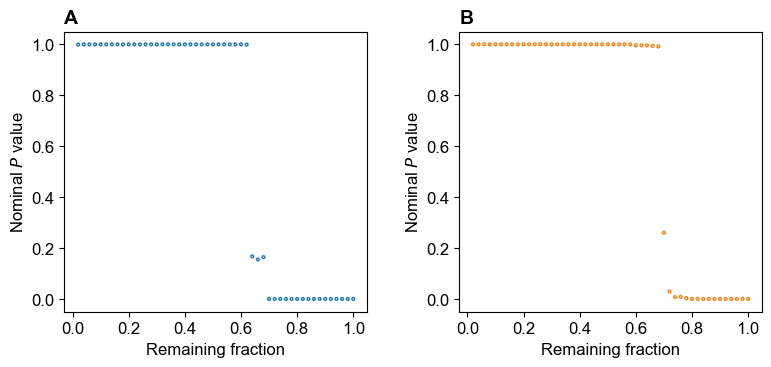

In [40]:
# (200,'V1'),(200,'V2')
gs = gridspec.GridSpec(2, 9) 
fig1 = plt.figure(figsize=(9,8))
#Here I generate sub figure object and assign to corresponding location
input_summary_1 = YPD_DNDN_summary
#panel A for YPD expression distribution
ax1 = fig1.add_subplot(gs[:1,:4])
ax1.scatter(input_summary_1['Quantile'],input_summary_1['P_value_resampled'],color ='tab:blue',facecolors='none',s =4)
ax1.set_ylabel("Nominal $\it{P}$ value")
ax1.set_xlabel('Remaining fraction')
ax1.set_title('A',loc = 'Left',weight = 'bold',size = 14)
# ax1.set_yscale('log')




####################
input_summary_1 = SCD_DNDN_summary
#panel A for YPD expression distribution
ax1 = fig1.add_subplot(gs[:1,5:9])
ax1.scatter(input_summary_1['Quantile'],input_summary_1['P_value_resampled'],color ='tab:orange',facecolors='none',s =4)
ax1.set_ylabel("Nominal $\it{P}$ value")
ax1.set_xlabel('Remaining fraction')
ax1.set_title('B',loc = 'Left',weight = 'bold',size = 14)
# ax1.set_yscale('log')


####################

# fig1.savefig(fig_output_address+'FigS16.pdf')

---

## Fig. S18

In [41]:
RD_comparison_df = pd.read_csv('Source_data/' + 'FigS18_RD_GXE_comparison.csv')

(-1.1013529948116398,
 1.1045808735634763,
 -1.1060777479864887,
 1.1002894175829454)

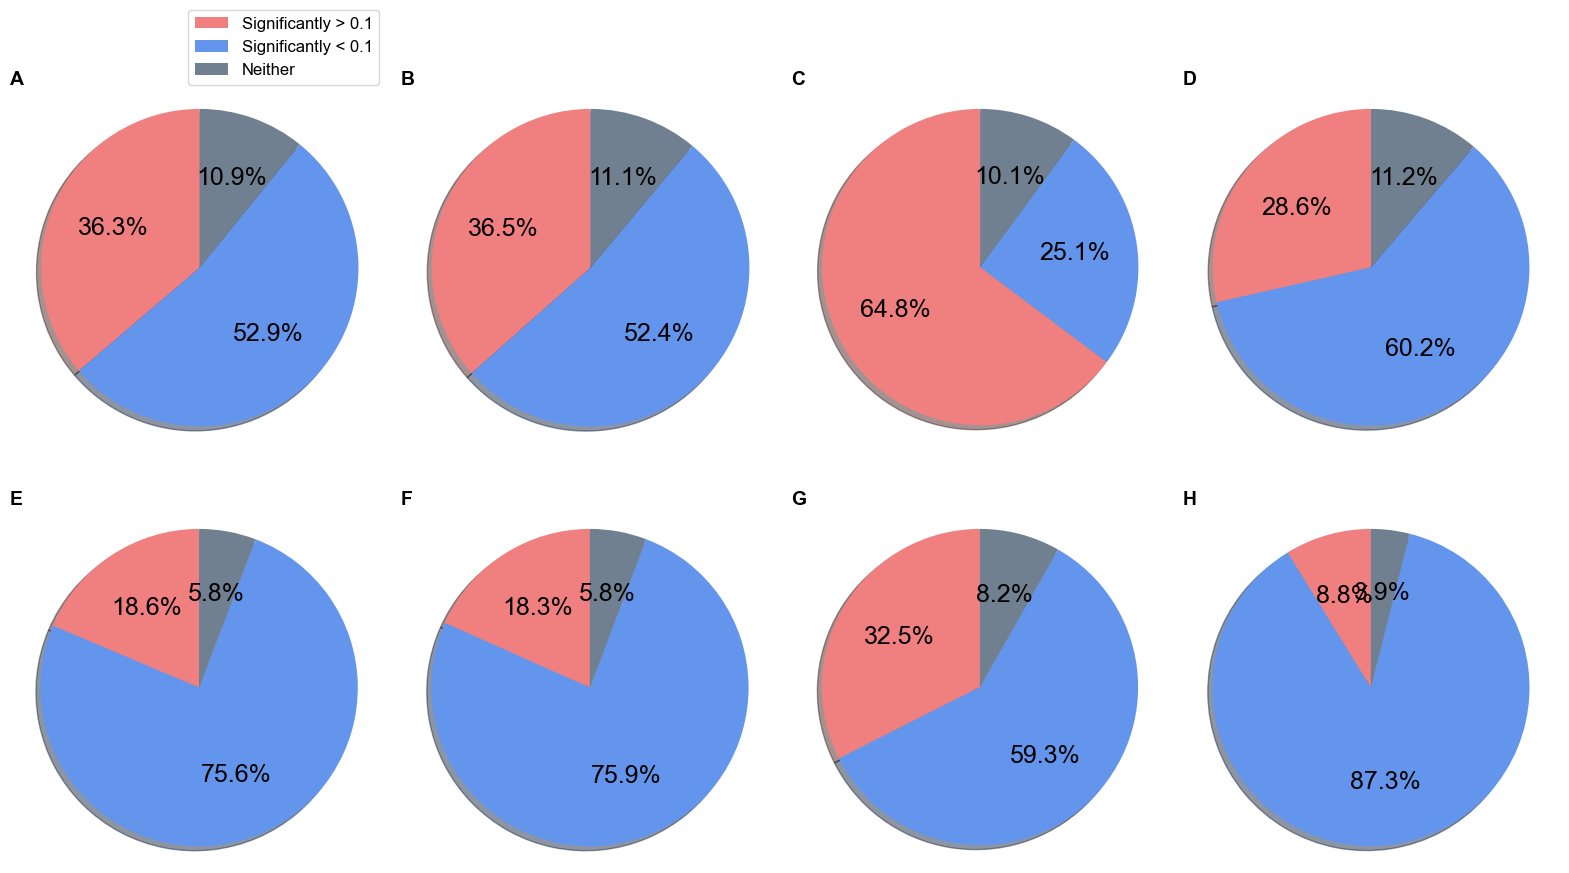

In [48]:
temp_df = RD_comparison_df.drop(columns = 'Panel_number').to_numpy()

gs = gridspec.GridSpec(2, 20) 
fig1 = plt.figure(figsize=(20,10))

three_color = ['lightcoral','cornflowerblue','slategrey']
ax1=fig1.add_subplot(gs[:1, :5])
explode = (0, 0, 0)
ax1.set_title('A',loc='left',weight ='bold', size = 14)
ax1.pie(temp_df[0], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax1.set_title('YPD',fontsize=18)
ax1.legend(loc='lower right', labels=['Significantly > 0.1','Significantly < 0.1','Neither'],bbox_to_anchor =(1, 1))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# sizes = np.array(change_count)[[0,3,6]]
# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax2=fig1.add_subplot(gs[:1, 5:10])
ax2.set_title('B',loc='left',weight ='bold', size = 14)
ax2.pie(temp_df[3], explode=explode, labels=None, autopct='%1.1f%%',colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax3.set_title('Significantly better than negative control in SCD',fontsize=18)

# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax3=fig1.add_subplot(gs[:1, 10:15])
ax3.set_title('C',loc='left',weight ='bold', size = 14)
ax3.pie(temp_df[1], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax5.set_title('Significantly worse than negative control in SCD',fontsize=18)

ax4=fig1.add_subplot(gs[:1, 15:20])
ax4.set_title('D',loc='left',weight ='bold', size = 14)
ax4.pie(temp_df[2], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax5=fig1.add_subplot(gs[1:2, :5])
# explode = (0, 0, 0)
ax5.set_title('E',loc='left',weight ='bold', size = 14)
ax5.pie(temp_df[4], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax1.set_title('YPD',fontsize=18)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# sizes = np.array(change_count)[[0,3,6]]
# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax6=fig1.add_subplot(gs[1:2, 5:10])
ax6.set_title('F',loc='left',weight ='bold', size = 14)
ax6.pie(temp_df[7], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax6.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax3.set_title('Significantly better than negative control in SCD',fontsize=18)

# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax7=fig1.add_subplot(gs[1:2, 10:15])
ax7.set_title('G',loc='left',weight ='bold', size = 14)
ax7.pie(temp_df[5], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax7.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax5.set_title('Significantly worse than negative control in SCD',fontsize=18)

ax8=fig1.add_subplot(gs[1:2, 15:20])
ax8.set_title('H',loc='left',weight ='bold', size = 14)
ax8.pie(temp_df[6], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax8.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# fig1.savefig(fig_output_address+'FigS17.pdf')

## Fig. S19

In [50]:
Intergenic_comparison_df = pd.read_csv('Source_data/' + 'FigS19_Intergenic_GXE_comparison.csv')

(-1.1101654345830683,
 1.1132560513612935,
 -1.1114723800127042,
 1.1005463038101289)

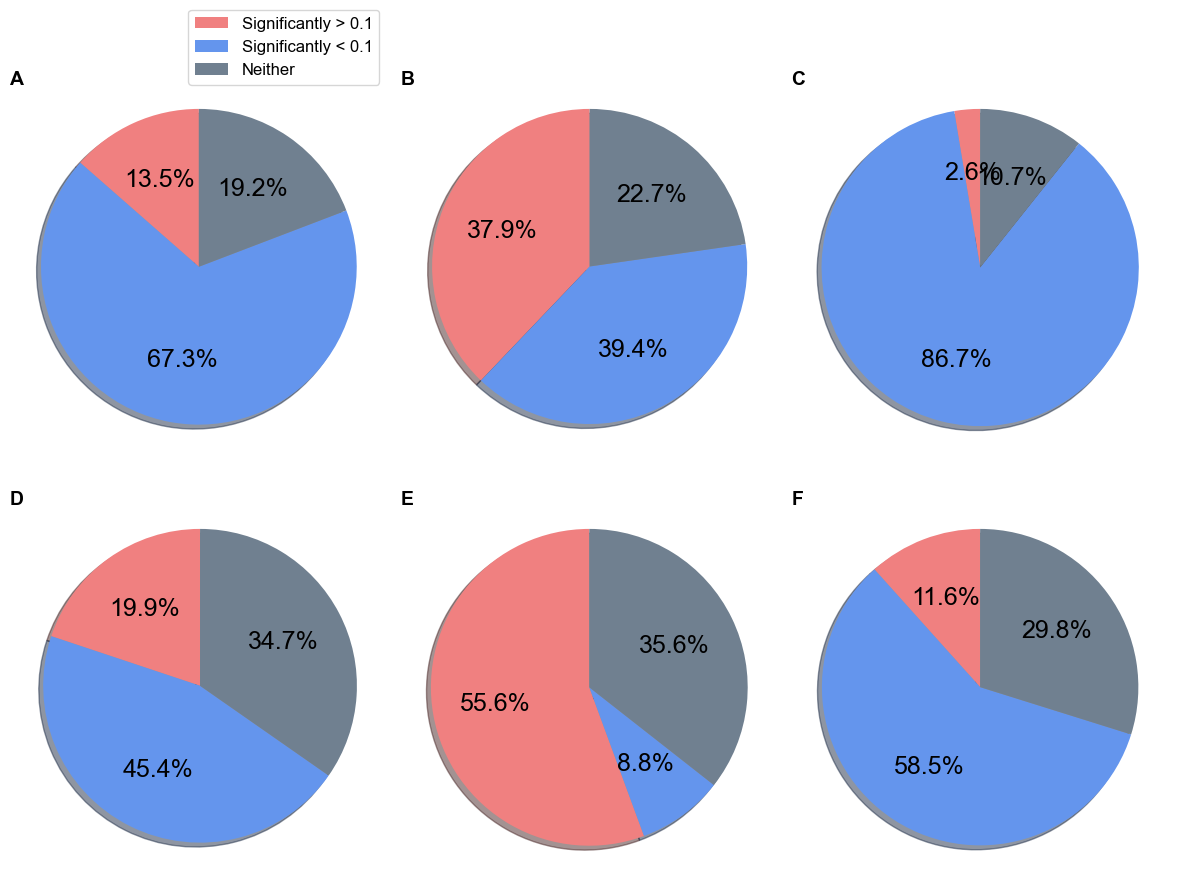

In [51]:
temp_df = Intergenic_comparison_df.drop(columns = 'Panel_number').to_numpy()


gs = gridspec.GridSpec(2, 20) 
fig1 = plt.figure(figsize=(20,10))

three_color = ['lightcoral','cornflowerblue','slategrey']
ax1=fig1.add_subplot(gs[:1, :5])
ax1.set_title('A',loc='left',weight ='bold', size = 14)
explode = (0, 0, 0)
ax1.pie(temp_df[0], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax1.set_title('YPD',fontsize=18)
ax1.legend(loc='lower right', labels=['Significantly > 0.1','Significantly < 0.1','Neither'],bbox_to_anchor =(1, 1))



# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax3=fig1.add_subplot(gs[:1, 5:10])
ax3.set_title('B',loc='left',weight ='bold', size = 14)
ax3.pie(temp_df[1], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax5.set_title('Significantly worse than negative control in SCD',fontsize=18)

ax4=fig1.add_subplot(gs[:1, 10:15])
ax4.set_title('C',loc='left',weight ='bold', size = 14)
ax4.pie(temp_df[2], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax5=fig1.add_subplot(gs[1:2, :5])
ax5.set_title('D',loc='left',weight ='bold', size = 14)
# explode = (0, 0, 0)
ax5.pie(temp_df[4], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax1.set_title('YPD',fontsize=18)


# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax7=fig1.add_subplot(gs[1:2, 5:10])
ax7.set_title('E',loc='left',weight ='bold', size = 14)
ax7.pie(temp_df[5], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax7.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax5.set_title('Significantly worse than negative control in SCD',fontsize=18)

ax8=fig1.add_subplot(gs[1:2, 10:15])
ax8.set_title('F',loc='left',weight ='bold', size = 14)
ax8.pie(temp_df[6], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax8.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# fig1.savefig(fig_output_address+'FigS18.pdf')

## Fig. S20

In [52]:
YPD_temp_df = pd.read_csv('Source_data/' + 'FigS20_YPD_individual_expression_comparison.csv')

In [53]:
SCD_temp_df = pd.read_csv('Source_data/' + 'FigS20_SCD_individual_expression_comparison.csv')

In [55]:
SCD_shared_fraction_nc_df = pd.read_csv('Source_data/' + 'FigS20_SCD_individual_expression_shared.csv')
YPD_shared_fraction_nc_df = pd.read_csv('Source_data/' + 'FigS20_YPD_individual_expression_shared.csv')

Text(0, 0.5, 'Fraction in SCD')

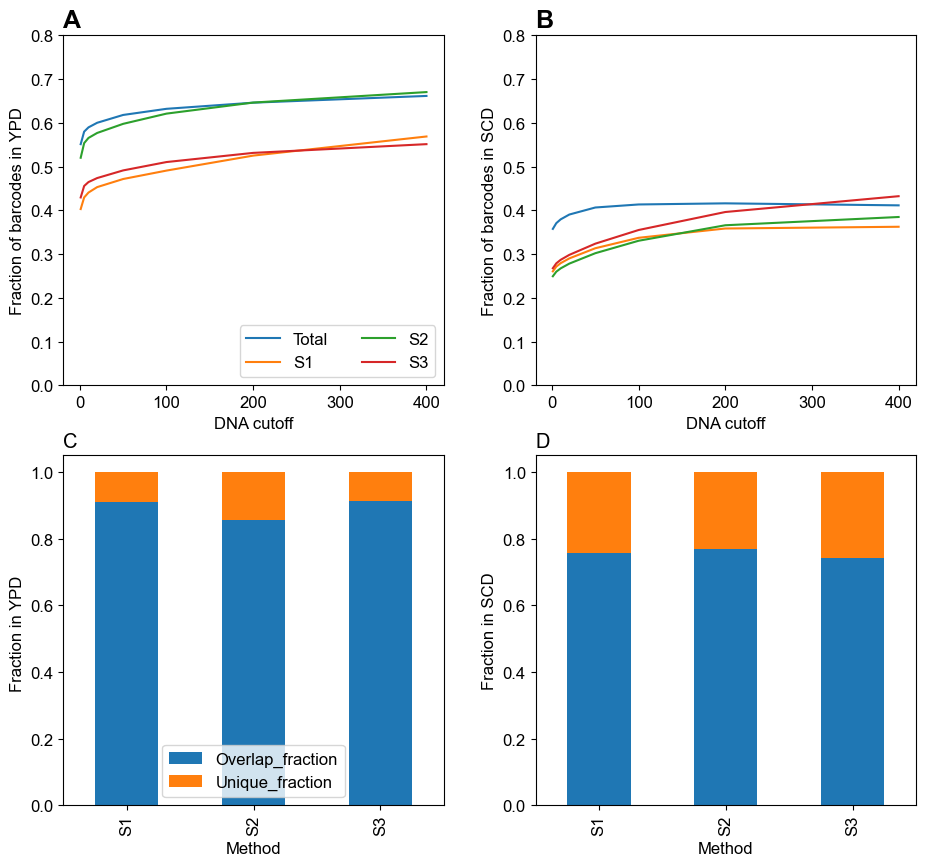

In [56]:
temp_df = YPD_temp_df

gs = gridspec.GridSpec(2, 11) 
fig1 = plt.figure(figsize=(11,10))
#Here I generate sub figure object and assign to corresponding location
ax1=fig1.add_subplot(gs[:1, :5])

ix = 'DNA_cut_off'
iy = 'better_than_nc_ratio'
sns.lineplot(data = temp_df,x = ix, y = iy, hue = 'Method')
ax1.set_title('A',weight='bold', loc='left', size= 18)
ax1.set_ylabel('Fraction of barcodes in YPD')
ax1.set_xlabel('DNA cutoff')
ax1.set_ylim(0,0.8)
ax1.legend(ncol=2, loc='lower right')

temp_df  = SCD_temp_df
ax2=fig1.add_subplot(gs[:1, 6:11])
ix = 'DNA_cut_off'
iy = 'better_than_nc_ratio'
sns.lineplot(data = temp_df,x = ix, y = iy, hue = 'Method')
ax2.set_title('B',weight='bold', loc='left', size= 18)
ax2.set_ylabel('Fraction of barcodes in SCD')
ax2.set_xlabel('DNA cutoff')
ax2.set_ylim(0,0.8)
ax2.legend([],[], frameon=False)

# YPD
ax1=fig1.add_subplot(gs[1:2, :5])
YPD_shared_fraction_nc_df.set_index('Method').plot(kind='bar', stacked=True,ax = ax1)
# ax1.legend([],[], frameon=False) # hide legend
ax1.set_title('C',loc = 'Left')
ax1.set_ylabel('Fraction in YPD ')


ax2=fig1.add_subplot(gs[1:2, 6:11])

SCD_shared_fraction_nc_df.set_index('Method').plot(kind='bar', stacked=True,ax = ax2)
ax2.legend([],[], frameon=False) # hide legend
ax2.set_title('D',loc = 'Left')
ax2.set_ylabel('Fraction in SCD')
# fig1.savefig(fig_output_address+'Fig_S20.pdf')

## Fig. S21

In [58]:
p_2a_YPD_100_WO = pd.read_csv('Source_data/' + 'FigS21_YPD_RD_expression_without_TATA.csv')
p_2a_YPD_100_W = pd.read_csv('Source_data/' + 'FigS21_YPD_RD_expression_with_TATA.csv')

In [59]:
p_2b_SCD_100_WO = pd.read_csv('Source_data/' + 'FigS21_SCD_RD_expression_without_TATA.csv')
p_2b_SCD_100_W = pd.read_csv('Source_data/' + 'FigS21_SCD_RD_expression_with_TATA.csv')

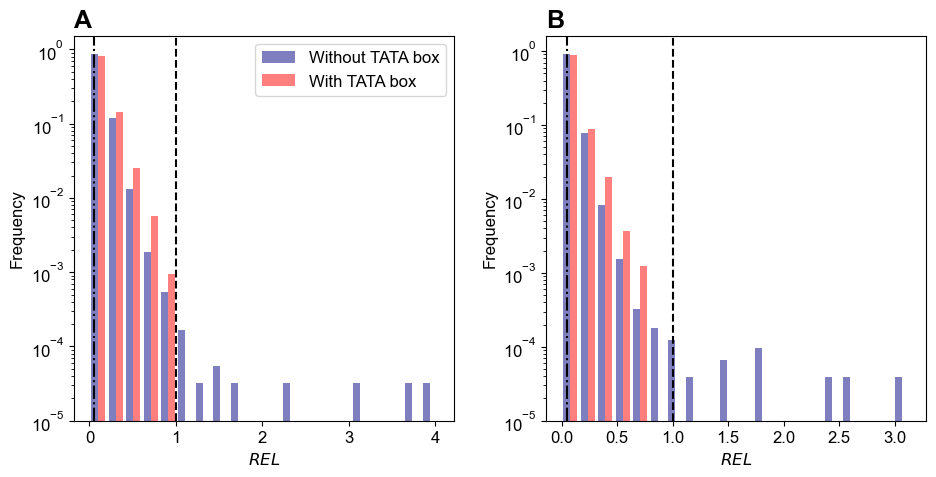

In [61]:
gs = gridspec.GridSpec(1, 11) 
fig1 = plt.figure(figsize=(11,5))
#Here I generate sub figure object and assign to corresponding location
#panel A for YPD expression distribution
ax1=fig1.add_subplot(gs[:1, :5])
temp_input = [p_2a_YPD_100_WO['relative_expression'].to_list(),p_2a_YPD_100_W['relative_expression'].to_list()]
x_w1 = np.empty(len(p_2a_YPD_100_WO['relative_expression'].to_list()))
x_w1.fill(1/len(p_2a_YPD_100_WO['relative_expression'].to_list()))
x_w2 = np.empty(len(p_2a_YPD_100_W['relative_expression'].to_list()))
x_w2.fill(1/len(p_2a_YPD_100_W['relative_expression'].to_list()))
ax1.hist(temp_input,bins=20, alpha=0.5, 
         weights=[x_w1, x_w2], label=['Without TATA box','With TATA box'],
         color=['navy','red'],bottom = 1e-5)
ax1.legend(loc="upper right")
ax1.set_title('A',weight='bold', loc='left', size= 18)
ax1.set_xlabel("$\it{REL}$")
ax1.set_ylabel("Frequency")
ax1.axvline(x=0.05027564758670754, color='black', linestyle='-.')
ax1.axvline(x=1,color='black', linestyle='--')
# ax1.axvline(x=1*YPD_factor,color='black', linestyle='--')
# ax1.set_xlim(-0.1,1.5)
ax1.set_yscale('log',base = 10)

#panel B for SCD expression distribution
ax2=fig1.add_subplot(gs[:1, 6:11])
temp_input = [p_2b_SCD_100_WO['relative_expression'].to_list(),p_2b_SCD_100_W['relative_expression'].to_list()]
x_w1 = np.empty(len(p_2b_SCD_100_WO['relative_expression'].to_list()))
x_w1.fill(1/len(p_2b_SCD_100_WO['relative_expression'].to_list()))
x_w2 = np.empty(len(p_2b_SCD_100_W['relative_expression'].to_list()))
x_w2.fill(1/len(p_2b_SCD_100_W['relative_expression'].to_list()))
ax2.hist(temp_input,bins=20, alpha=0.5, 
         weights=[x_w1, x_w2], label=['Without TATA box','With TATA box'],
         color=['navy','red'],bottom = 1e-5)
ax2.set_title('B',weight='bold', loc='left', size= 18)
ax2.set_xlabel("$\it{REL}$")
ax2.set_ylabel("Frequency")
ax2.axvline(x=0.04596995226553077,color='black', linestyle='-.')
ax2.axvline(x=1,color='black', linestyle='--')
ax2.set_yscale('log',base = 10)

# fig1.savefig(fig_output_address+'FigSS1.pdf')